## Problem Set #[8]
MACS 30150, Dr. Evans

Linghui Wu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

### Question 1

#### (a)

In [2]:
drink = pd.read_csv("data/strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
drink.isna().sum()

cultivar      0
alco          0
malic         0
ash           0
alk           0
magn          0
tot_phen      0
flav          0
nonfl_phen    0
proanth       0
color_int     0
hue           0
OD280rat      0
proline       0
dtype: int64

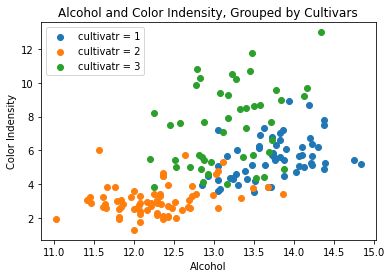

In [4]:
alco = drink["alco"]
color_int = drink["color_int"]

for i in range(1, 4):
    plt.scatter(alco.loc[drink["cultivar"] == i], color_int.loc[drink["cultivar"] == i], label="cultivatr = " + str(i))

plt.xlabel("Alcohol")
plt.ylabel("Color Indensity")
plt.title("Alcohol and Color Indensity, Grouped by Cultivars")
plt.legend()
plt.show();

#### (b)

In [5]:
X = drink[["alco", "malic", "tot_phen", "color_int"]]
y = drink["cultivar"]

In [10]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
               'max_depth': sp_randint(2, 4),
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}
RFC = RandomForestClassifier(random_state=25)
rscv_rf = RandomizedSearchCV(RFC, param_dist2, 
         n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

In [11]:
rf = rscv_rf.fit(X, y)

exception calling callback for <Future at 0x12fc16790 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/linghuiwu/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/linghuiwu/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 340, in __call__
    self.parallel.dispatch_next()
  File "/Users/linghuiwu/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 769, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/linghuiwu/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/linghuiwu/opt/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/Users/linghuiwu/opt/anaconda3/lib/python3.7/site-packages/joblib/_parallel

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

#### (c)

#### (d)

#### (e)

#### (f)